In [33]:
#导入数据
import numpy as np
linear_dataset = np.loadtxt('linear_points_dataset.txt')
X = linear_dataset[:,:-1]
y = linear_dataset[:,-1].astype('int')

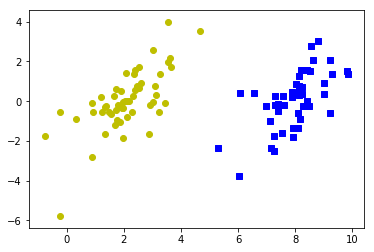

In [34]:
#数据可视化
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
for label,color,marker in zip(set(y),'by',['s','o']):
    index = np.where(y==label)
    plt.scatter(X[index,0],X[index,1],c = color,marker = marker)

In [35]:
#构建、评估分类器
from sklearn import svm
clf = svm.SVC()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X,y,scoring = 'accuracy')
print(np.mean(scores))

0.989898989899


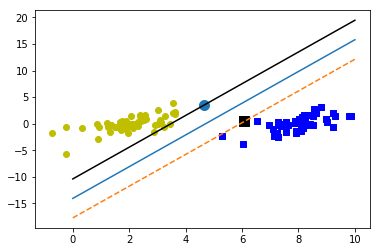

In [32]:
#结果可视化
import matplotlib.pyplot as plt
plt.figure()
for label,color,marker in zip(set(y),'by',['s','o']):
    index = np.where(y==label)
    plt.scatter(X[index,0],X[index,1],c = color,marker = marker)
clf = svm.SVC(kernel = 'linear')
clf.fit(X,y)
coef = clf.coef_[0]
intercept = clf.intercept_[0]
xx = np.linspace(0,10,500)
yy = (-intercept-coef[0]*xx)/coef[1]
plt.plot(xx,yy)
support_vectors = clf.support_vectors_
xydown = support_vectors[0]
xyup = support_vectors[-1]
intercept_down = (-coef[0]*xydown[0]-coef[1]*xydown[1])
intercept_up = (-coef[0]*xyup[0]-coef[1]*xyup[1])
yydown = (-intercept_down-coef[0]*xx)/coef[1]
yyup = (-intercept_up-coef[0]*xx)/coef[1]
plt.plot(xx,yydown,c = 'k')
plt.plot(xx,yyup,linestyle = '--')
plt.scatter(xydown[0],xydown[1],s = 100)
plt.scatter(xyup[0],xyup[1],s = 100,c = 'k',marker = 's')

In [37]:
#导入数据
rbf_points_dataset1 = np.loadtxt('rbf_points_dataset1.txt')
X = rbf_points_dataset1[:,:-1]
y = rbf_points_dataset1[:,-1].astype('int')

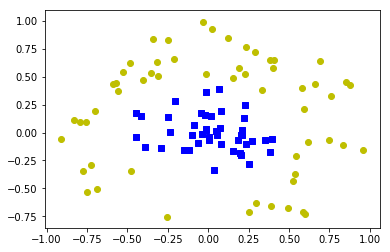

In [40]:
#数据可视化
%matplotlib inline
import matplotlib.pyplot as plt
for label,color,marker in zip(set(y),'by',['s','o']):
    index = np.where(y==label)
    plt.scatter(X[index,0],X[index,1],c = color,marker = marker)

In [41]:
#构建、评估分类器
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X,y,scoring = 'accuracy')
print(np.mean(scores))

0.610906862745


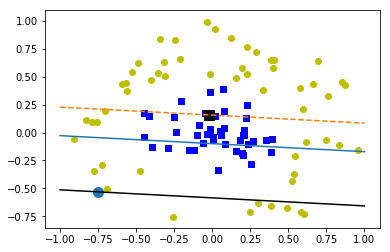

In [43]:
#结果可视化
import matplotlib.pyplot as plt
plt.figure()
for label,color,marker in zip(set(y),'by',['s','o']):
    index = np.where(y==label)
    plt.scatter(X[index,0],X[index,1],c = color,marker = marker)
clf = svm.SVC(kernel = 'linear')
clf.fit(X,y)
coef = clf.coef_[0]
intercept = clf.intercept_[0]
xx = np.linspace(-1,1,200)
yy = (-intercept-coef[0]*xx)/coef[1]
plt.plot(xx,yy)
support_vectors = clf.support_vectors_
xydown = support_vectors[0]
xyup = support_vectors[-1]
intercept_down = (-coef[0]*xydown[0]-coef[1]*xydown[1])
intercept_up = (-coef[0]*xyup[0]-coef[1]*xyup[1])
yydown = (-intercept_down-coef[0]*xx)/coef[1]
yyup = (-intercept_up-coef[0]*xx)/coef[1]
plt.plot(xx,yydown,c = 'k')
plt.plot(xx,yyup,linestyle = '--')
plt.scatter(xydown[0],xydown[1],s = 100)
plt.scatter(xyup[0],xyup[1],s = 100,c = 'k',marker = 's')

In [44]:
#构建、评估分类器
from sklearn import svm
clf = svm.SVC(kernel='rbf')
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X,y,scoring = 'accuracy')
print(np.mean(scores))

0.96875


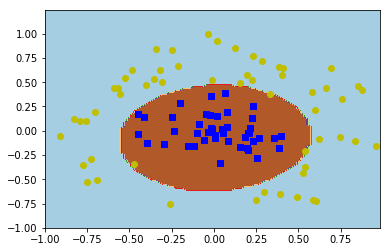

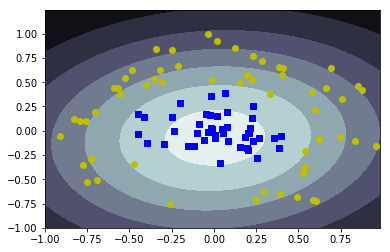

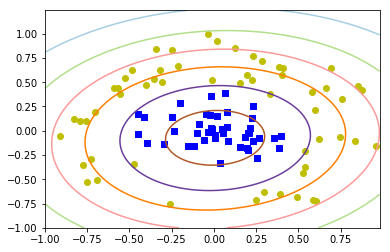

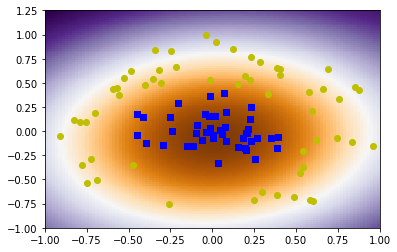

In [72]:
#结果可视化
import matplotlib.pyplot as plt
clf = svm.SVC(kernel='rbf')
clf.fit(X,y)
xmin,xmax = (-1,1)
ymin,ymax = (-1,1.25)
mesh_step = 0.02
xx,yy = np.meshgrid(np.arange(xmin,xmax,mesh_step),np.arange(ymin,ymax,mesh_step))
plt.figure(0)
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap = plt.cm.Paired)
for label,color,marker in zip(set(y),'by',['s','o']):
    index = np.where(y==label)
    plt.scatter(X[index,0],X[index,1],c = color,marker = marker)
plt.figure(1)
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap = plt.cm.bone)
for label,color,marker in zip(set(y),'by',['s','o']):
    index = np.where(y==label)
    plt.scatter(X[index,0],X[index,1],c = color,marker = marker)
plt.figure(2)
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx,yy,Z,cmap = plt.cm.Paired)
for label,color,marker in zip(set(y),'by',['s','o']):
    index = np.where(y==label)
    plt.scatter(X[index,0],X[index,1],c = color,marker = marker)
plt.figure(3)
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(Z,extent = (xmin,xmax,ymin,ymax),cmap=plt.cm.PuOr_r,aspect='auto',
          origin = 'lower')
for label,color,marker in zip(set(y),'by',['s','o']):
    index = np.where(y==label)
    plt.scatter(X[index,0],X[index,1],c = color,marker = marker)